<a href="https://colab.research.google.com/github/ththtec/projeto02-sql/blob/main/Notebook_de_An%C3%A1lise_de_Vendas_no_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Banco de dados criado e populado com sucesso em memória!

--- INICIANDO ANÁLISE DE DADOS ---

1. Clientes do estado de São Paulo (SP):
     nome_cliente         email_cliente
0       Ana Silva       ana.s@email.com
1      Carla Dias     carla.d@email.com
2  Fernanda Rocha  fernanda.r@email.com
3   Isabel Moraes    i.moraes@email.com
4    Eduardo Reis    edu.reis@email.com
--------------------------------------------------

2. Produtos da categoria 'Ficção Científica':
             nome_produto  preco_produto
0                    Duna           80.5
1    O Guia do Mochileiro           42.0
2                O Hobbit           70.0
3             Neuromancer           70.0
4  A Revolução dos Bichos           55.0
5        Senhor dos Anéis           80.0
--------------------------------------------------

3. Relatório geral de vendas (cliente, produto, data):
        nome_cliente                    nome_produto  data_venda  quantidade
0          Ana Silva              Fundamentos de SQL  

/tmp/ipython-input-2064004714.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=executar_query("SELECT estado_cliente FROM Clientes"), y='estado_cliente', order = executar_query("SELECT estado_cliente FROM Clientes")['estado_cliente'].value_counts().index, palette='viridis')


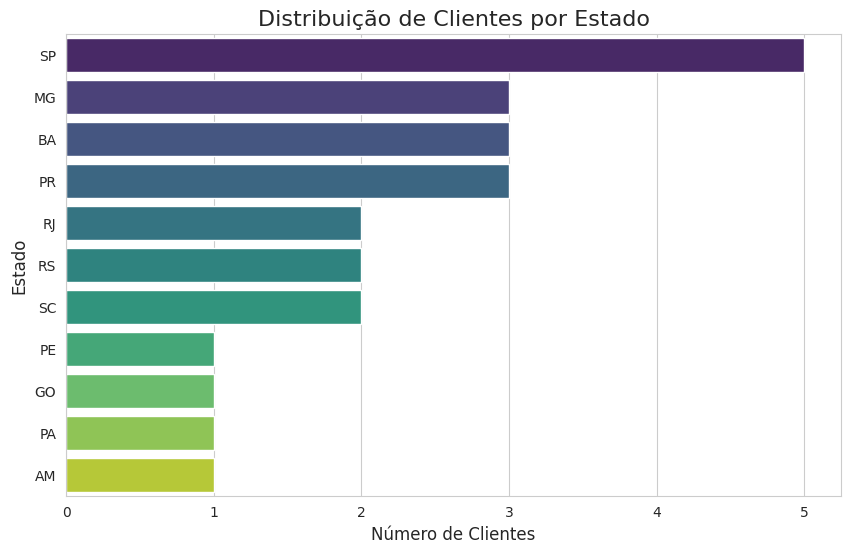

/tmp/ipython-input-2064004714.py:236: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mais_vendidos, x='total_quantidade_vendida', y='nome_produto', palette='plasma')


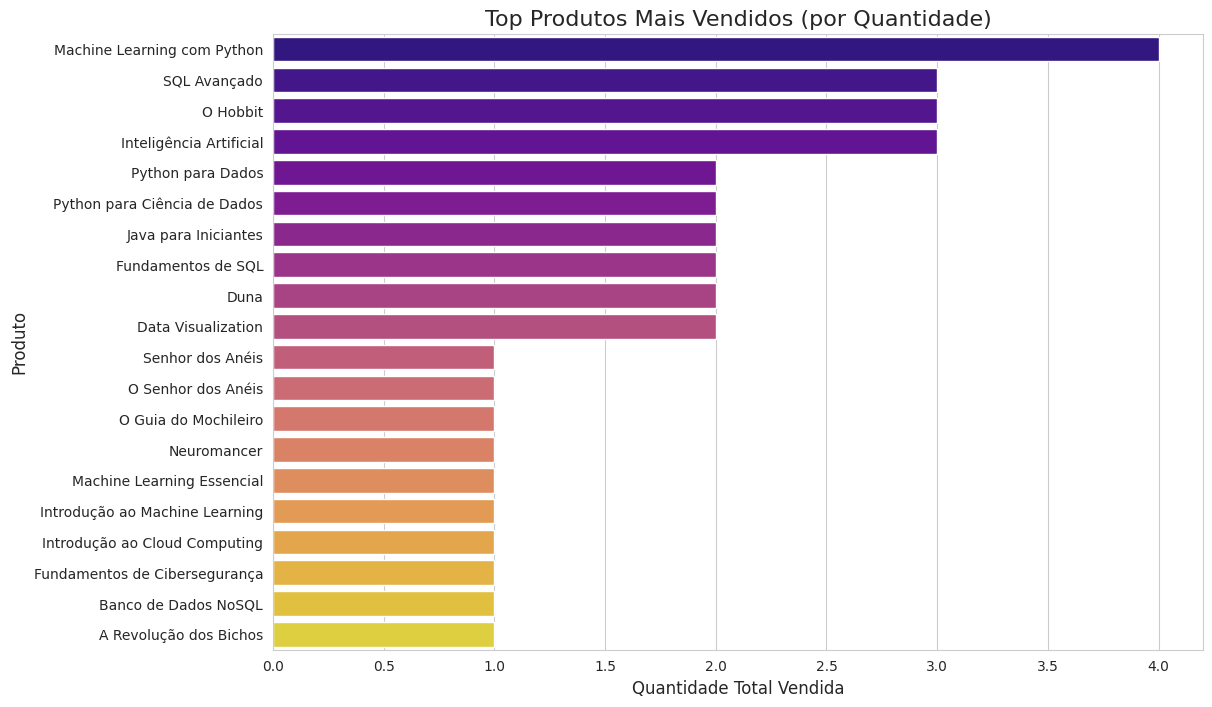

/tmp/ipython-input-2064004714.py:260: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_faturamento_categoria, x='faturamento_total', y='categoria_produto', palette='magma')


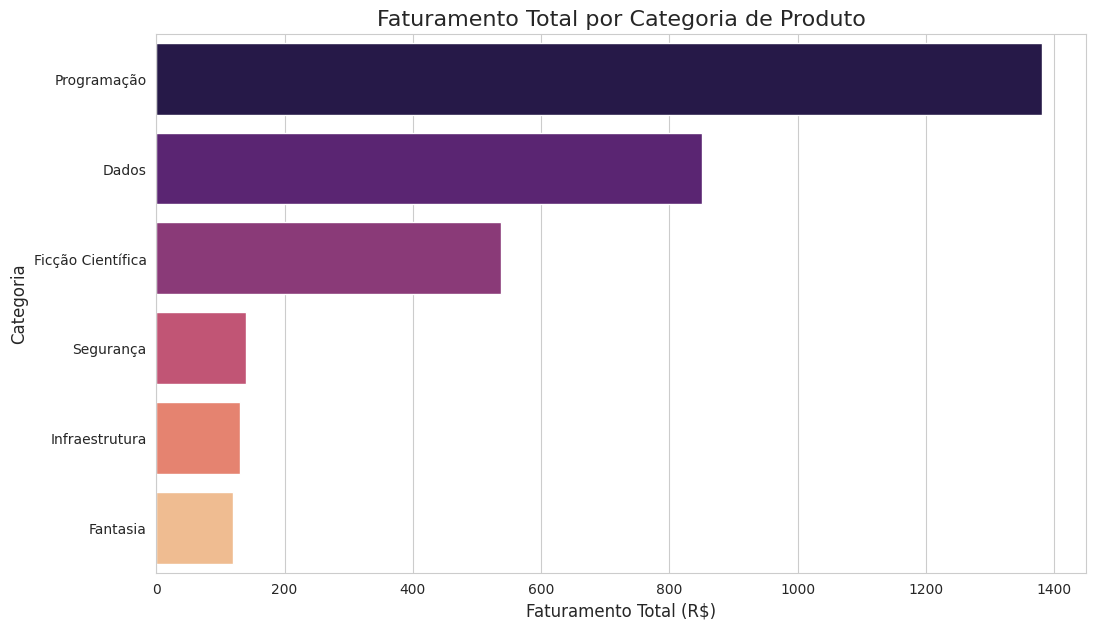

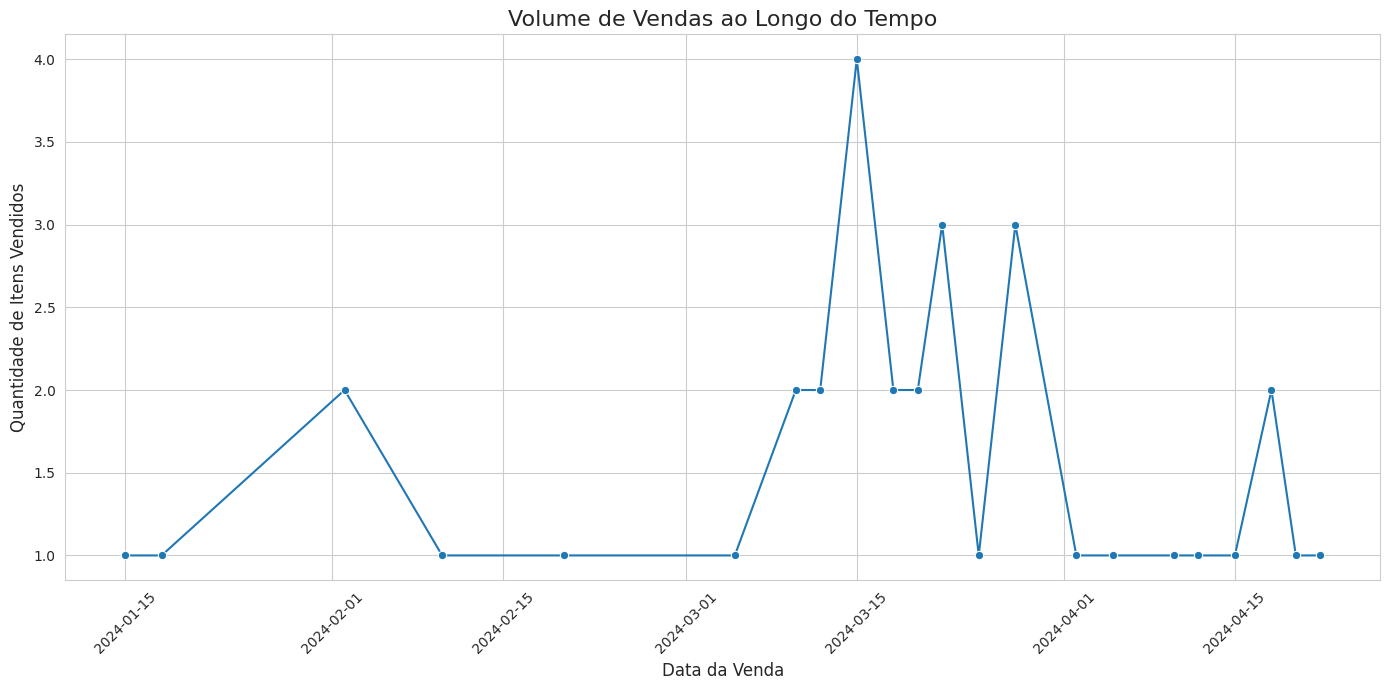


✅ Análise concluída e conexão com o banco de dados fechada.


In [1]:
# -*- coding: utf-8 -*-
"""
# 🚀 Análise de Vendas com SQL e Python

Este notebook realiza uma análise completa sobre uma base de dados de vendas,
utilizando SQL para as consultas e Python (com Pandas e Matplotlib/Seaborn)
para a manipulação e visualização dos dados.

**Objetivos:**
1.  Criar e popular um banco de dados SQLite em memória.
2.  Executar consultas SQL para responder perguntas de negócio.
3.  Visualizar os resultados para extrair insights.
"""

# ==============================================================================
# CÉLULA 1: CONFIGURAÇÃO E CRIAÇÃO DO BANCO DE DADOS
# ==============================================================================

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização para os gráficos e tabelas
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Script SQL completo (DDL + DML)
# Este script cria as tabelas e insere todos os dados de uma só vez.
script_sql_completo = """
-- Tabela de Clientes
CREATE TABLE Clientes (
    id_cliente      INTEGER PRIMARY KEY,
    nome_cliente    TEXT,
    email_cliente   TEXT,
    estado_cliente  TEXT
);

-- Tabela de Produtos
CREATE TABLE Produtos (
    id_produto          INTEGER PRIMARY KEY,
    nome_produto        TEXT,
    categoria_produto   TEXT,
    preco_produto       REAL
);

-- Tabela de Vendas
CREATE TABLE Vendas (
    id_venda        INTEGER PRIMARY KEY,
    id_cliente      INTEGER,
    id_produto      INTEGER,
    data_venda      DATE,
    quantidade      INTEGER,
    FOREIGN KEY (id_cliente) REFERENCES Clientes(id_cliente),
    FOREIGN KEY (id_produto) REFERENCES Produtos(id_produto)
);

-- Inserções Iniciais
INSERT INTO Clientes (id_cliente, nome_cliente, email_cliente, estado_cliente) VALUES
    (1, 'Ana Silva', 'ana.s@email.com', 'SP'), (2, 'Bruno Costa', 'b.costa@email.com', 'RJ'),
    (3, 'Carla Dias', 'carla.d@email.com', 'SP'), (4, 'Daniel Souza', 'daniel.s@email.com', 'MG'),
    (5, 'Lucas Martins', 'lucas.m@email.com', 'BA'), (6, 'Fernanda Rocha', 'fernanda.r@email.com', 'SP'),
    (7, 'João Lima', 'joao.l@email.com', 'RJ'), (8, 'Aline Souza', 'aline.s@email.com', 'MG'),
    (9, 'Eduarda Martins', 'eduarda.m@email.com', 'BA'), (10, 'Felipe Rocha', 'felipe.r@email.com', 'RS'),
    (11, 'Gabriela Lima', 'gabriela.l@email.com', 'PR'), (12, 'Henrique Alves', 'henrique.a@email.com', 'PE'),
    (13, 'Diego Santos', 'diego.s@email.com', 'GO'), (14, 'Larissa Ferreira', 'larissa.f@email.com', 'PA'),
    (15, 'André Nascimento', 'andre.n@email.com', 'AM'), (16, 'Patrícia Mendes', 'patricia.m@email.com', 'SC'),
    (17, 'Fernanda Lima', 'f.lima@email.com', 'PR'), (18, 'Gustavo Mendes', 'g.mendes@email.com', 'BA'),
    (19, 'Helena Costa', 'h.costa@email.com', 'MG'), (20, 'Isabel Moraes', 'i.moraes@email.com', 'SP'),
    (21, 'Eduardo Reis', 'edu.reis@email.com', 'SP'), (22, 'Fernanda Lima', 'fernanda.l@email.com', 'PR'),
    (23, 'Gustavo Nogueira', 'gustavo.n@email.com', 'RS'), (24, 'Helena Martins', 'helena.m@email.com', 'SC');

INSERT INTO Produtos (id_produto, nome_produto, categoria_produto, preco_produto) VALUES
    (101, 'Fundamentos de SQL', 'Dados', 60.00), (102, 'Duna', 'Ficção Científica', 80.50),
    (103, 'Python para Dados', 'Programação', 75.00), (104, 'O Guia do Mochileiro', 'Ficção Científica', 42.00),
    (105, 'SQL Avançado', 'Dados', 85.00), (106, 'Inteligência Artificial', 'Programação', 120.00),
    (107, 'O Hobbit', 'Ficção Científica', 70.00), (108, 'Machine Learning com Python', 'Programação', 110.00),
    (109, 'Machine Learning Essencial', 'Dados', 95.00), (110, 'Neuromancer', 'Ficção Científica', 70.00),
    (111, 'Java para Iniciantes', 'Programação', 65.50), (112, 'Senhor dos Anéis', 'Fantasia', 120.00),
    (113, 'Introdução ao Cloud Computing', 'Infraestrutura', 130.00), (114, 'Python para Ciência de Dados', 'Programação', 95.00),
    (115, 'Fundamentos de Cibersegurança', 'Segurança', 140.00), (116, 'Banco de Dados NoSQL', 'Dados', 110.00),
    (117, 'O Senhor dos Anéis', 'Dados', 95.00), (118, 'Introdução ao Machine Learning', 'Programação', 110.00),
    (119, 'Data Visualization', 'Dados', 88.00), (120, 'A Revolução dos Bichos', 'Ficção Científica', 55.00),
    (121, 'Python para Iniciantes', 'Programação', 95.00), (122, 'Gestão de Projetos', 'Administração', 130.00),
    (123, 'Senhor dos Anéis', 'Ficção Científica', 80.00), (124, 'Estatística Aplicada', 'Dados', 100.00);

INSERT INTO Vendas (id_venda, id_cliente, id_produto, data_venda, quantidade) VALUES
    (1, 1, 101, '2024-01-15', 1), (2, 2, 102, '2024-01-18', 1), (3, 3, 103, '2024-02-02', 2),
    (4, 1, 102, '2024-02-10', 1), (5, 4, 101, '2024-02-20', 1), (6, 2, 104, '2024-03-05', 1),
    (7, 5, 105, '2024-03-10', 1), (8, 6, 106, '2024-03-12', 1), (9, 7, 107, '2024-03-15', 2),
    (10, 5, 107, '2024-03-20', 1), (11, 8, 105, '2024-03-22', 1), (12, 6, 108, '2024-03-25', 1),
    (13, 9, 109, '2024-03-12', 1), (14, 10, 110, '2024-03-15', 1), (15, 11, 111, '2024-03-18', 2),
    (16, 12, 112, '2024-03-20', 1), (17, 13, 113, '2024-04-15', 1), (18, 14, 114, '2024-04-18', 2),
    (19, 15, 115, '2024-04-20', 1), (20, 16, 116, '2024-04-22', 1), (21, 1, 117, '2024-03-10', 1),
    (22, 2, 118, '2024-03-15', 1), (23, 3, 119, '2024-03-22', 2), (24, 1, 120, '2024-03-28', 1),
    (25, 21, 108, '2024-03-28', 2), (26, 9, 106, '2024-04-02', 1), (27, 10, 105, '2024-04-05', 1),
    (28, 9, 108, '2024-04-10', 1), (29, 23, 106, '2024-04-12', 1);
"""

# Criar uma conexão com um banco de dados SQLite em memória
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Executar o script SQL para criar e popular as tabelas
cursor.executescript(script_sql_completo)
conn.commit()

print("✅ Banco de dados criado e populado com sucesso em memória!")

# Função auxiliar para executar queries e retornar DataFrames
def executar_query(query):
    """Executa uma query SQL e retorna o resultado como um DataFrame do Pandas."""
    return pd.read_sql_query(query, conn)

# ==============================================================================
# CÉLULA 2: ANÁLISE DE DADOS - EXECUTANDO AS CONSULTAS
# ==============================================================================

print("\n--- INICIANDO ANÁLISE DE DADOS ---\n")

# --- Pergunta 1: Qual o nome dos clientes que moram no estado de 'SP'? ---
print("1. Clientes do estado de São Paulo (SP):")
query1 = """
SELECT
    nome_cliente,
    email_cliente
FROM
    Clientes
WHERE
    estado_cliente = 'SP';
"""
df_clientes_sp = executar_query(query1)
print(df_clientes_sp)
print("-" * 50)


# --- Pergunta 2: Quais produtos pertencem à categoria 'Ficção Científica'? ---
print("\n2. Produtos da categoria 'Ficção Científica':")
query2 = """
SELECT
    nome_produto,
    preco_produto
FROM
    Produtos
WHERE
    categoria_produto = 'Ficção Científica';
"""
df_ficcao = executar_query(query2)
print(df_ficcao)
print("-" * 50)


# --- Pergunta 3: Listando todas as vendas com detalhes ---
print("\n3. Relatório geral de vendas (cliente, produto, data):")
query3 = """
SELECT
    c.nome_cliente,
    p.nome_produto,
    v.data_venda,
    v.quantidade
FROM
    Vendas AS v
JOIN
    Clientes AS c ON v.id_cliente = c.id_cliente
JOIN
    Produtos AS p ON v.id_produto = p.id_produto
ORDER BY
    v.data_venda;
"""
df_vendas_detalhes = executar_query(query3)
print(df_vendas_detalhes)
print("-" * 50)


# --- Pergunta 4: Qual o valor total de cada venda? ---
print("\n4. Valor total por venda:")
query4 = """
SELECT
    v.id_venda,
    c.nome_cliente,
    p.nome_produto,
    (v.quantidade * p.preco_produto) AS valor_total
FROM
    Vendas AS v
JOIN
    Clientes AS c ON v.id_cliente = c.id_cliente
JOIN
    Produtos AS p ON v.id_produto = p.id_produto
ORDER BY
    valor_total DESC;
"""
df_valor_venda = executar_query(query4)
# Formatando a coluna para moeda
df_valor_venda['valor_total'] = df_valor_venda['valor_total'].map('R$ {:,.2f}'.format)
print(df_valor_venda)
print("-" * 50)


# --- Pergunta 5: Qual o produto mais vendido em termos de quantidade? ---
print("\n5. Ranking de produtos mais vendidos (por quantidade):")
query5 = """
SELECT
    p.nome_produto,
    SUM(v.quantidade) AS total_quantidade_vendida
FROM
    Vendas AS v
JOIN
    Produtos AS p ON v.id_produto = p.id_produto
GROUP BY
    p.nome_produto
ORDER BY
    total_quantidade_vendida DESC;
"""
df_mais_vendidos = executar_query(query5)
print(df_mais_vendidos)
print("-" * 50)


# ==============================================================================
# CÉLULA 3: VISUALIZAÇÃO DE DADOS
# ==============================================================================

# --- Gráfico 1: Distribuição de Clientes por Estado ---
plt.figure(figsize=(10, 6))
sns.countplot(data=executar_query("SELECT estado_cliente FROM Clientes"), y='estado_cliente', order = executar_query("SELECT estado_cliente FROM Clientes")['estado_cliente'].value_counts().index, palette='viridis')
plt.title('Distribuição de Clientes por Estado', fontsize=16)
plt.xlabel('Número de Clientes', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.show()


# --- Gráfico 2: Produtos mais vendidos ---
plt.figure(figsize=(12, 8))
sns.barplot(data=df_mais_vendidos, x='total_quantidade_vendida', y='nome_produto', palette='plasma')
plt.title('Top Produtos Mais Vendidos (por Quantidade)', fontsize=16)
plt.xlabel('Quantidade Total Vendida', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.show()


# --- Gráfico 3: Faturamento por Categoria de Produto ---
query_faturamento_categoria = """
SELECT
    p.categoria_produto,
    SUM(v.quantidade * p.preco_produto) AS faturamento_total
FROM
    Vendas v
JOIN
    Produtos p ON v.id_produto = p.id_produto
GROUP BY
    p.categoria_produto
ORDER BY
    faturamento_total DESC;
"""
df_faturamento_categoria = executar_query(query_faturamento_categoria)

plt.figure(figsize=(12, 7))
sns.barplot(data=df_faturamento_categoria, x='faturamento_total', y='categoria_produto', palette='magma')
plt.title('Faturamento Total por Categoria de Produto', fontsize=16)
plt.xlabel('Faturamento Total (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.show()


# --- Gráfico 4: Vendas ao longo do tempo ---
query_vendas_tempo = """
SELECT
    data_venda,
    SUM(quantidade) as total_vendas
FROM Vendas
GROUP BY data_venda
ORDER BY data_venda;
"""
df_vendas_tempo = executar_query(query_vendas_tempo)
df_vendas_tempo['data_venda'] = pd.to_datetime(df_vendas_tempo['data_venda'])

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_vendas_tempo, x='data_venda', y='total_vendas', marker='o')
plt.title('Volume de Vendas ao Longo do Tempo', fontsize=16)
plt.xlabel('Data da Venda', fontsize=12)
plt.ylabel('Quantidade de Itens Vendidos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==============================================================================
# CÉLULA 4: FECHANDO A CONEXÃO
# ==============================================================================
conn.close()
print("\n✅ Análise concluída e conexão com o banco de dados fechada.")

# 🚀 Análise de Vendas com SQL e Python

Este notebook realiza uma análise completa sobre uma base de dados de vendas. Usaremos SQL para as consultas e Python (com as bibliotecas Pandas, Matplotlib e Seaborn) para a manipulação e visualização dos dados.

# Passo 1: Configuração do Ambiente

In [2]:
# Importando as bibliotecas necessárias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização para os gráficos e tabelas
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Criar uma conexão com um banco de dados SQLite em memória
# O banco de dados existirá apenas enquanto o notebook estiver em execução
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

print(" Ambiente configurado e conexão com o banco de dados estabelecida.")

 Ambiente configurado e conexão com o banco de dados estabelecida.


#Passo 2: Criação da Estrutura das Tabelas (Schema)

Agora, vamos definir a estrutura (schema) do nosso banco de dados. Criaremos três tabelas: Clientes e Produtos (tabelas de dimensão) e Vendas (tabela de fatos). Usaremos o comando CREATE TABLE.

In [14]:
# Script para criação das tabelas
script_criacao_tabelas = """
-- Tabela de Clientes
CREATE TABLE Clientes (
    id_cliente      INTEGER PRIMARY KEY,
    nome_cliente    TEXT,
    email_cliente   TEXT,
    estado_cliente  TEXT
);

-- Tabela de Produtos
CREATE TABLE Produtos (
    id_produto          INTEGER PRIMARY KEY,
    nome_produto        TEXT,
    categoria_produto   TEXT,
    preco_produto       REAL
);

-- Tabela de Vendas
CREATE TABLE Vendas (
    id_venda        INTEGER PRIMARY KEY,
    id_cliente      INTEGER,
    id_produto      INTEGER,
    data_venda      DATE,
    quantidade      INTEGER,
    FOREIGN KEY (id_cliente) REFERENCES Clientes(id_cliente),
    FOREIGN KEY (id_produto) REFERENCES Produtos(id_produto)
);
"""

# Executando o script de criação
cursor.executescript(script_criacao_tabelas)
conn.commit()

print("Tabelas Clientes, Produtos e Vendas criadas com sucesso.")


ProgrammingError: Cannot operate on a closed database.

# Passo 3: Inserção dos Dados nas Tabelas

Com as tabelas criadas, o próximo passo é populá-las com os dados. Usaremos o comando INSERT INTO para adicionar os registros de clientes, produtos e todas as vendas.

In [4]:
# Script para inserção de todos os dados
script_insercao_dados = """
INSERT INTO Clientes (id_cliente, nome_cliente, email_cliente, estado_cliente) VALUES
    (1, 'Ana Silva', 'ana.s@email.com', 'SP'), (2, 'Bruno Costa', 'b.costa@email.com', 'RJ'),
    (3, 'Carla Dias', 'carla.d@email.com', 'SP'), (4, 'Daniel Souza', 'daniel.s@email.com', 'MG'),
    (5, 'Lucas Martins', 'lucas.m@email.com', 'BA'), (6, 'Fernanda Rocha', 'fernanda.r@email.com', 'SP'),
    (7, 'João Lima', 'joao.l@email.com', 'RJ'), (8, 'Aline Souza', 'aline.s@email.com', 'MG'),
    (9, 'Eduarda Martins', 'eduarda.m@email.com', 'BA'), (10, 'Felipe Rocha', 'felipe.r@email.com', 'RS'),
    (11, 'Gabriela Lima', 'gabriela.l@email.com', 'PR'), (12, 'Henrique Alves', 'henrique.a@email.com', 'PE'),
    (13, 'Diego Santos', 'diego.s@email.com', 'GO'), (14, 'Larissa Ferreira', 'larissa.f@email.com', 'PA'),
    (15, 'André Nascimento', 'andre.n@email.com', 'AM'), (16, 'Patrícia Mendes', 'patricia.m@email.com', 'SC'),
    (17, 'Fernanda Lima', 'f.lima@email.com', 'PR'), (18, 'Gustavo Mendes', 'g.mendes@email.com', 'BA'),
    (19, 'Helena Costa', 'h.costa@email.com', 'MG'), (20, 'Isabel Moraes', 'i.moraes@email.com', 'SP'),
    (21, 'Eduardo Reis', 'edu.reis@email.com', 'SP'), (22, 'Fernanda Lima', 'fernanda.l@email.com', 'PR'),
    (23, 'Gustavo Nogueira', 'gustavo.n@email.com', 'RS'), (24, 'Helena Martins', 'helena.m@email.com', 'SC');

INSERT INTO Produtos (id_produto, nome_produto, categoria_produto, preco_produto) VALUES
    (101, 'Fundamentos de SQL', 'Dados', 60.00), (102, 'Duna', 'Ficção Científica', 80.50),
    (103, 'Python para Dados', 'Programação', 75.00), (104, 'O Guia do Mochileiro', 'Ficção Científica', 42.00),
    (105, 'SQL Avançado', 'Dados', 85.00), (106, 'Inteligência Artificial', 'Programação', 120.00),
    (107, 'O Hobbit', 'Ficção Científica', 70.00), (108, 'Machine Learning com Python', 'Programação', 110.00),
    (109, 'Machine Learning Essencial', 'Dados', 95.00), (110, 'Neuromancer', 'Ficção Científica', 70.00),
    (111, 'Java para Iniciantes', 'Programação', 65.50), (112, 'Senhor dos Anéis', 'Fantasia', 120.00),
    (113, 'Introdução ao Cloud Computing', 'Infraestrutura', 130.00), (114, 'Python para Ciência de Dados', 'Programação', 95.00),
    (115, 'Fundamentos de Cibersegurança', 'Segurança', 140.00), (116, 'Banco de Dados NoSQL', 'Dados', 110.00),
    (117, 'O Senhor dos Anéis', 'Dados', 95.00), (118, 'Introdução ao Machine Learning', 'Programação', 110.00),
    (119, 'Data Visualization', 'Dados', 88.00), (120, 'A Revolução dos Bichos', 'Ficção Científica', 55.00),
    (121, 'Python para Iniciantes', 'Programação', 95.00), (122, 'Gestão de Projetos', 'Administração', 130.00),
    (123, 'Senhor dos Anéis', 'Ficção Científica', 80.00), (124, 'Estatística Aplicada', 'Dados', 100.00);

INSERT INTO Vendas (id_venda, id_cliente, id_produto, data_venda, quantidade) VALUES
    (1, 1, 101, '2024-01-15', 1), (2, 2, 102, '2024-01-18', 1), (3, 3, 103, '2024-02-02', 2),
    (4, 1, 102, '2024-02-10', 1), (5, 4, 101, '2024-02-20', 1), (6, 2, 104, '2024-03-05', 1),
    (7, 5, 105, '2024-03-10', 1), (8, 6, 106, '2024-03-12', 1), (9, 7, 107, '2024-03-15', 2),
    (10, 5, 107, '2024-03-20', 1), (11, 8, 105, '2024-03-22', 1), (12, 6, 108, '2024-03-25', 1),
    (13, 9, 109, '2024-03-12', 1), (14, 10, 110, '2024-03-15', 1), (15, 11, 111, '2024-03-18', 2),
    (16, 12, 112, '2024-03-20', 1), (17, 13, 113, '2024-04-15', 1), (18, 14, 114, '2024-04-18', 2),
    (19, 15, 115, '2024-04-20', 1), (20, 16, 116, '2024-04-22', 1), (21, 1, 117, '2024-03-10', 1),
    (22, 2, 118, '2024-03-15', 1), (23, 3, 119, '2024-03-22', 2), (24, 1, 120, '2024-03-28', 1),
    (25, 21, 108, '2024-03-28', 2), (26, 9, 106, '2024-04-02', 1), (27, 10, 105, '2024-04-05', 1),
    (28, 9, 108, '2024-04-10', 1), (29, 23, 106, '2024-04-12', 1);
"""

# Executando o script de inserção
cursor.executescript(script_insercao_dados)
conn.commit()

print(" Dados inseridos com sucesso em todas as tabelas.")

 Dados inseridos com sucesso em todas as tabelas.


# Passo 4: Análise de Dados - Respondendo Perguntas de Negócio

 Vamos executar consultas SQL scripitadas no projeto. Para facilitar a manipulação dos resultados, criaremos uma função auxiliar (executar_query) que já retorna os dados como um DataFrame do Pandas.

In [5]:
# Função auxiliar para executar queries e retornar DataFrames
def executar_query(query):
    """Executa uma query SQL e retorna o resultado como um DataFrame do Pandas."""
    return pd.read_sql_query(query, conn)

print("Função 'executar_query' criada.")

Função 'executar_query' criada.


## Pergunta 1: Qual o nome dos clientes que moram no estado de 'SP'?

In [6]:
query1 = "SELECT nome_cliente, email_cliente FROM Clientes WHERE estado_cliente = 'SP';"
df_clientes_sp = executar_query(query1)
print("--- Clientes de São Paulo (SP) ---")
display(df_clientes_sp)

--- Clientes de São Paulo (SP) ---


,nome_cliente,email_cliente
0,Ana Silva,ana.s@email.com
1,Carla Dias,carla.d@email.com
2,Fernanda Rocha,fernanda.r@email.com
3,Isabel Moraes,i.moraes@email.com
4,Eduardo Reis,edu.reis@email.com


## Pergunta 2: Quais produtos pertencem à categoria 'Ficção Científica'?

In [7]:
query2 = "SELECT nome_produto, preco_produto FROM Produtos WHERE categoria_produto = 'Ficção Científica';"
df_ficcao = executar_query(query2)
print("\n--- Produtos de Ficção Científica ---")
display(df_ficcao)



--- Produtos de Ficção Científica ---


,nome_produto,preco_produto
0,Duna,80.5
1,O Guia do Mochileiro,42.0
2,O Hobbit,70.0
3,Neuromancer,70.0
4,A Revolução dos Bichos,55.0
5,Senhor dos Anéis,80.0


## Pergunta 3: Qual o produto mais vendido em termos de quantidade?

In [8]:
query3 = """
SELECT
    p.nome_produto,
    SUM(v.quantidade) AS total_quantidade_vendida
FROM
    Vendas AS v
JOIN
    Produtos AS p ON v.id_produto = p.id_produto
GROUP BY
    p.nome_produto
ORDER BY
    total_quantidade_vendida DESC;
"""
df_mais_vendidos = executar_query(query3)
print("\n--- Ranking de Produtos Mais Vendidos ---")
display(df_mais_vendidos)


--- Ranking de Produtos Mais Vendidos ---


,nome_produto,total_quantidade_vendida
0,Machine Learning com Python,4
1,SQL Avançado,3
2,O Hobbit,3
3,Inteligência Artificial,3
4,Python para Dados,2
5,Python para Ciência de Dados,2
6,Java para Iniciantes,2
7,Fundamentos de SQL,2
8,Duna,2
9,Data Visualization,2


# Passo 5: Visualização de Dados

Agora, vamos usar gráficos para visualizar os dados e facilitar a extração de insights.

## Gráfico 1: Distribuição de Clientes por Estado

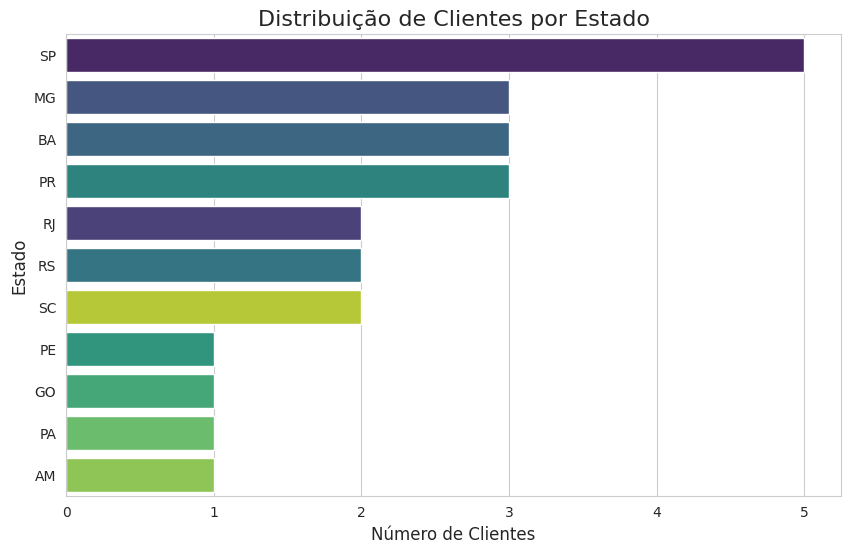

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_clientes,
    y='estado_cliente',
    hue='estado_cliente',
    order=df_clientes['estado_cliente'].value_counts().index,
    palette='viridis',
    legend=False
)
plt.title('Distribuição de Clientes por Estado', fontsize=16)
plt.xlabel('Número de Clientes', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.show()


### Pergunta 1: Qual o nome dos clientes que moram no estado de 'SP'?

In [56]:
query1 = """
SELECT
    nome_cliente
FROM
    Clientes
WHERE
    estado_cliente = 'SP';
"""
df_q1 = executar_query(query1)
display(df_q1)


,nome_cliente
0,Ana Silva
1,Carla Dias
2,Fernanda Rocha
3,Isabel Moraes
4,Eduardo Reis


## Gráfico 2: Faturamento Total por Categoria de Produto

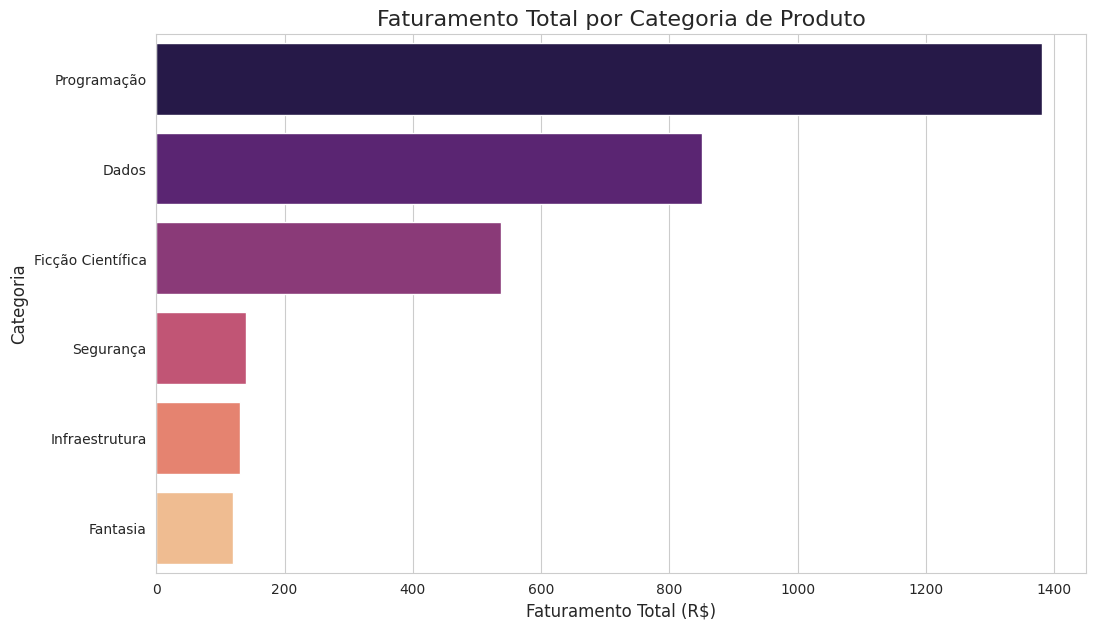

In [11]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_faturamento_categoria,
    x='faturamento_total',
    y='categoria_produto',
    hue='categoria_produto',
    palette='magma',
    legend=False
)
plt.title('Faturamento Total por Categoria de Produto', fontsize=16)
plt.xlabel('Faturamento Total (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.show()


### Pergunta 2: Quais produtos pertencem à categoria 'Ficção Científica'?

In [59]:
query2 = """
SELECT
    nome_produto
FROM
    Produtos
WHERE
    categoria_produto = 'Ficção Científica';
"""
df_q2 = executar_query(query2)
display(df_q2)


,nome_produto
0,Duna
1,O Guia do Mochileiro
2,O Hobbit
3,Neuromancer
4,A Revolução dos Bichos
5,Senhor dos Anéis


## Gráfico 3: Volume de Vendas ao Longo do Tempo

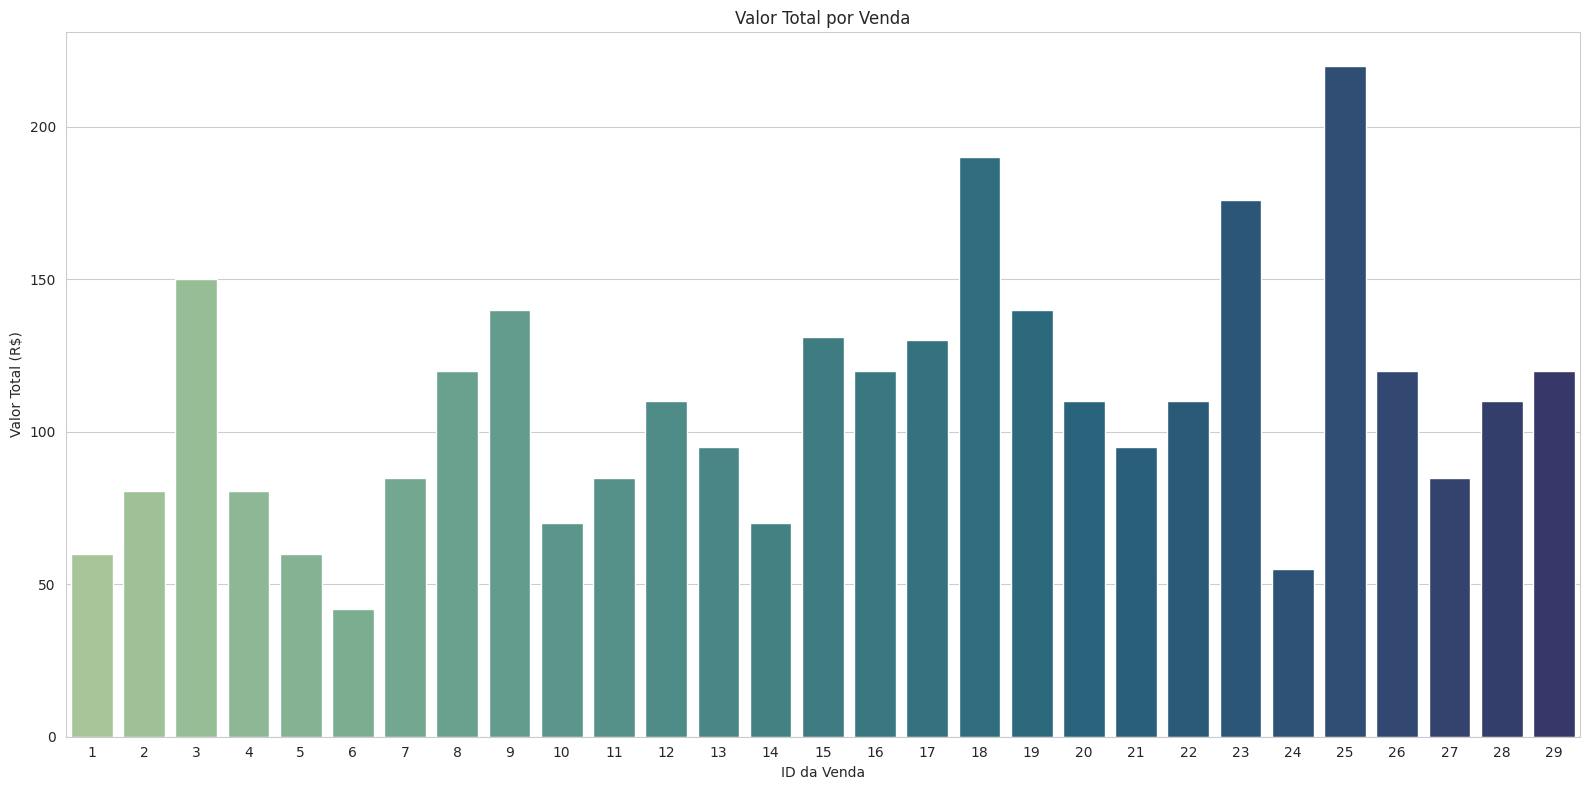

In [44]:
# Gráfico de distribuição de vendas por cliente
df_valor_venda = executar_query(query4)


plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_valor_venda,
    x='id_venda',
    y='valor_total',
    hue='id_venda',
    palette='crest',
    legend=False
)
plt.title('Valor Total por Venda')
plt.xlabel('ID da Venda')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=0) #define a legenda na rotação 0 para facilitar a leitura.
plt.tight_layout()
plt.show()


### Pergunta 3: Listar todas as vendas, mostrando o nome do cliente, o nome do produto e a data da venda.

In [55]:
query3 = """
SELECT
    v.data_venda,
    c.nome_cliente,
    p.nome_produto

FROM
    Vendas AS v
JOIN
    Clientes AS c ON v.id_cliente = c.id_cliente
JOIN
    Produtos AS p ON v.id_produto = p.id_produto
ORDER BY
    v.data_venda;
"""
df_q3 = executar_query(query3)
display(df_q3)


,data_venda,nome_cliente,nome_produto
0,2024-01-15,Ana Silva,Fundamentos de SQL
1,2024-01-18,Bruno Costa,Duna
2,2024-02-02,Carla Dias,Python para Dados
3,2024-02-10,Ana Silva,Duna
4,2024-02-20,Daniel Souza,Fundamentos de SQL
5,2024-03-05,Bruno Costa,O Guia do Mochileiro
6,2024-03-10,Lucas Martins,SQL Avançado
7,2024-03-10,Ana Silva,O Senhor dos Anéis
8,2024-03-12,Fernanda Rocha,Inteligência Artificial
9,2024-03-12,Eduarda Martins,Machine Learning Essencial


##  Gráfico 4: Vendas ao longo do tempo

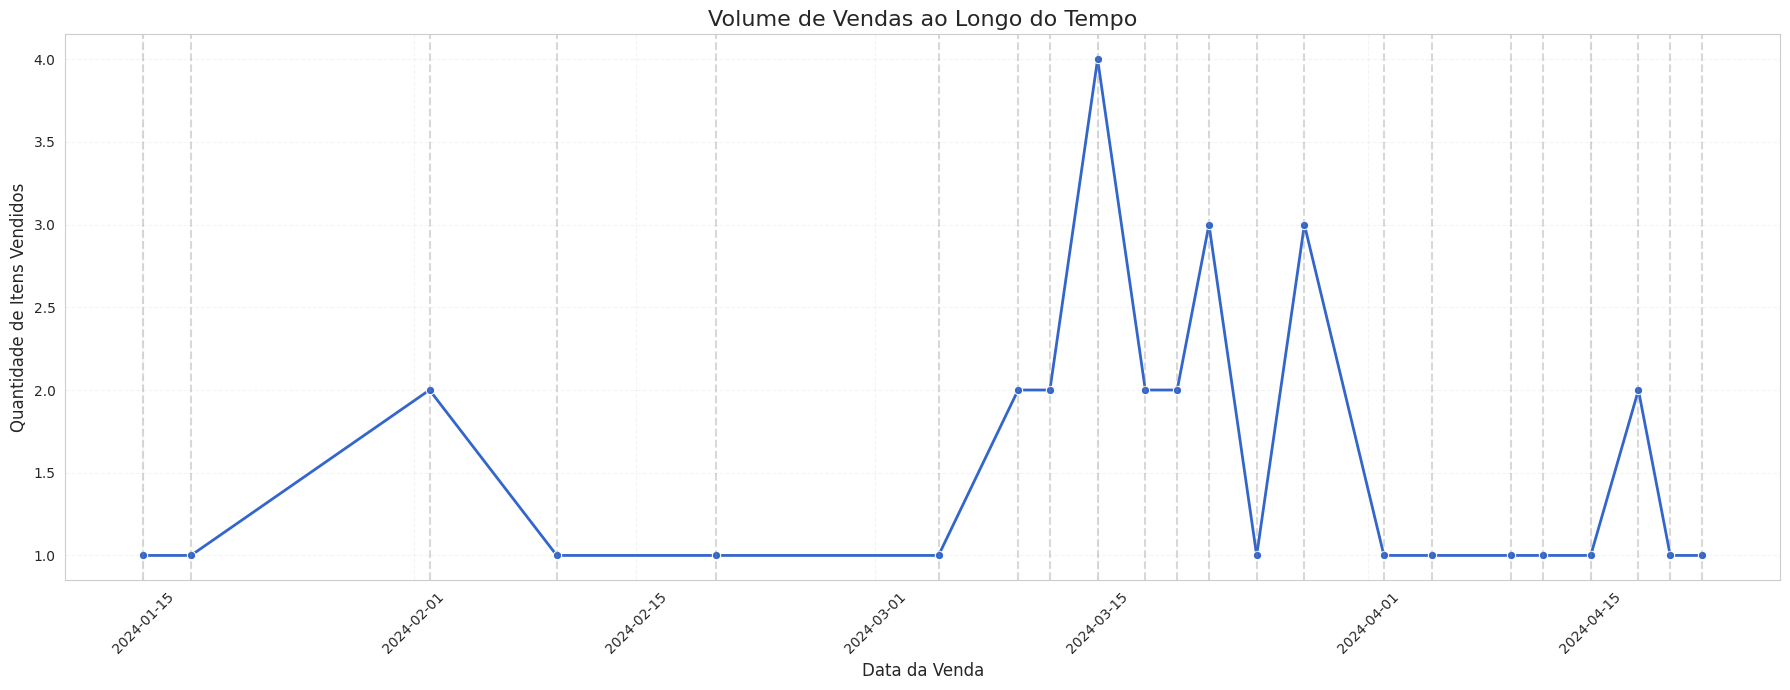

In [73]:
df_vendas_tempo = executar_query(query_vendas_tempo)
df_vendas_tempo['data_venda'] = pd.to_datetime(df_vendas_tempo['data_venda'])

plt.figure(figsize=(18, 7))

# Gráfico principal
sns.lineplot(data=df_vendas_tempo, x='data_venda', y='total_vendas', marker='o', linewidth=2, color='#3366cc')

# Adiciona uma linha vertical em cada data de venda
for data in df_vendas_tempo['data_venda']:
    plt.axvline(x=data, color='gray', linestyle='--', alpha=0.3)

# Estilização
plt.title('Volume de Vendas ao Longo do Tempo', fontsize=16)
plt.xlabel('Data da Venda', fontsize=12)
plt.ylabel('Quantidade de Itens Vendidos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()


###Pergunta 4: Qual o valor total de cada venda?

In [47]:
query4 = """
SELECT
    v.id_venda,
    c.nome_cliente,
    p.nome_produto,
    (v.quantidade * p.preco_produto) AS valor_total
FROM
    Vendas AS v
JOIN
    Clientes AS c ON v.id_cliente = c.id_cliente
JOIN
    Produtos AS p ON v.id_produto = p.id_produto
ORDER BY
    v.id_venda;
"""
df_q4 = executar_query(query4)

# Formatando a coluna para moeda (BRL)
df_q4['valor_total'] = df_q4['valor_total'].map('R$ {:,.2f}'.format)
display(df_q4)

,id_venda,nome_cliente,nome_produto,valor_total
0,1,Ana Silva,Fundamentos de SQL,R$ 60.00
1,2,Bruno Costa,Duna,R$ 80.50
2,3,Carla Dias,Python para Dados,R$ 150.00
3,4,Ana Silva,Duna,R$ 80.50
4,5,Daniel Souza,Fundamentos de SQL,R$ 60.00
5,6,Bruno Costa,O Guia do Mochileiro,R$ 42.00
6,7,Lucas Martins,SQL Avançado,R$ 85.00
7,8,Fernanda Rocha,Inteligência Artificial,R$ 120.00
8,9,João Lima,O Hobbit,R$ 140.00
9,10,Lucas Martins,O Hobbit,R$ 70.00


## Gráfico 4: Vendas ao longo do temp

### Pergunta 5: Qual o produto mais vendido em termos de quantidade?

In [48]:
query5 = """
SELECT
    p.nome_produto,
    SUM(v.quantidade) AS total_quantidade_vendida
FROM
    Vendas AS v
JOIN
    Produtos AS p ON v.id_produto = p.id_produto
GROUP BY
    p.nome_produto
ORDER BY
    total_quantidade_vendida DESC
LIMIT 1;
"""
df_q5 = executar_query(query5)
display(df_q5)


,nome_produto,total_quantidade_vendida
0,Machine Learning com Python,4


# Passo 6: Finalização

In [12]:
# Fechando a conexão com o banco de dados
conn.close()
print("✅ Análise concluída e conexão com o banco de dados fechada.")


✅ Análise concluída e conexão com o banco de dados fechada.


#PARA NOVAS CONSULTAS

> ⚠️ **ATENÇÃO:**  
> Após a célula de encerramento (`conn.close()`), o banco de dados em memória é destruído.  
> Para realizar **novas consultas**, é necessário **reabrir a conexão** e **executar novamente o script de criação e inserção de dados**.

In [20]:
# Reabrir conexão (se necessário)
conn = sqlite3.connect(':memory:')
# Reexecutar o script de criação e inserção de dados
cursor = conn.cursor()
cursor.executescript(script_sql_completo)
conn.commit()

from datetime import datetime
print(f"✅ Conexão estabelecida às {datetime.now().strftime('%H:%M:%S')}!")


✅ Conexão estabelecida às 23:08:10!
